# sklearn v/s sklearnex
## Comparing Stock Scikit-Learn with Intel Extension for Scikit-Learn

In [54]:
#importing the required libraries
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [55]:
data = pl.read_csv(r"diabetes_binary_health_indicators_BRFSS2015.csv")

In [56]:
data.head()

Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [57]:
data.tail()

Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [58]:
data.shape

(253680, 22)

In [59]:
features = data[["Age", "Sex", "BMI", "Smoker", "HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack",
"PhysActivity", "HvyAlcoholConsump", "GenHlth", "MentHlth", "PhysHlth"]]

In [60]:
features.head()

Age,Sex,BMI,Smoker,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
9.0,0.0,40.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,18.0,15.0
7.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
9.0,0.0,28.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0
11.0,0.0,27.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
11.0,0.0,24.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0


In [61]:
features.tail()

Age,Sex,BMI,Smoker,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
5.0,1.0,45.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0
11.0,0.0,18.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
9.0,0.0,25.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0


In [62]:
features.shape

(253680, 13)

In [63]:
target = data[["Diabetes_binary"]]

In [64]:
target.head()

Diabetes_binary
f64
0.0
0.0
0.0
0.0
0.0


In [65]:
target.tail()

Diabetes_binary
f64
0.0
1.0
0.0
0.0
1.0


In [66]:
target.shape

(253680, 1)

In [67]:
#Creating the features(X) and target(y) variables.
X = features
y = target

In [68]:
#Standard train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
#DTC Model training
%time model = DecisionTreeClassifier(max_depth = 10, random_state = 42)
model.fit(X_train, y_train)

CPU times: user 17 µs, sys: 4 µs, total: 21 µs
Wall time: 24.3 µs


DecisionTreeClassifier(max_depth=10, random_state=42)

In [70]:
#Model Testing
%time y_pred = model.predict(X_test)
print(y_pred)

CPU times: user 15.8 ms, sys: 748 µs, total: 16.5 ms
Wall time: 8.08 ms
[0. 0. 0. ... 0. 0. 0.]


In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8650070955534531


In [72]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[42798   941]
 [ 5908  1089]]


In [73]:
cm = confusion_matrix(y_test, y_pred)
# Extract values
tn, fp, fn, tp = cm.ravel()
# Calculate Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.978486019342006


In [74]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.16      0.24      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.58     50736
weighted avg       0.83      0.87      0.83     50736



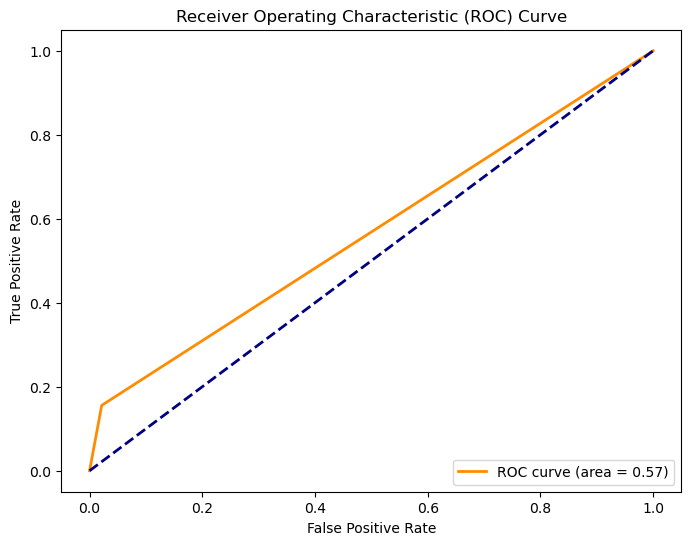

In [75]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Terminated